### À faire
+ vitesse dans ajustement des dates
+ flattenList, pairing : transformer en fichiers, ou pickles

## Motivation du projet
Une entreprise s'est faite voler des sommes considérables pendant quelques années entre 2005-2021, dates pour lesquelles nous disposons de toutes les transactions regroupant notamment les informations Montant, date, quart de travail, numero de facture. 

C'est une petite entreprise avec peu de personnel. Le voleur avait un horaire regulier et etait la depuis quelques temps et a vole avec regularite et progressivement. Le voleur s'est fait demasque progressivement: le responsable de contabilite s'est apercu que l'entreprise achetait plus d'un type de produit que l'entreprise n'en vendait: ces produits disparaissaient. Sur le coup, le responsable a attribue le phenomene au systeme de gestion des commandes, entre autre, sans faire davantage d'exploration; le responsable a ete negligeant. Il a fallu, bien plus tard, et avec la mefiance subconsciente du responsable qu'un client inoportunement ramene un produit qui avait ete faussement vendu. Alors une longue recherche pour decouvrir des preuves et identifier le voleur a debute. L'appel en justice etait trop complique pour etre interessant au proprietaire de l'entreprise, notamment parce que l'importance du vol exigeait une poursuite au criminel ou le fardeau de la preuve exigeait des temoins, ce qui aurait ete nefaste a l'entreprise. 

J'explique le systeme du voleur. Les produits etaient voles simplement en n'entrant pas leur vente dans le systeme. Le voleur employait peut-etre un moyen supplementaire pour faire mieux passer la disparition du produit de l'inventaire. Le voleur participait aussi au processus de commande. Pour sortir un maximum de monnaie de la caisse, le voleur faisait passer des montants payes par carte sur des factures de services payees en espece. Ainsi, on retrouvait des factures de service payees sur deux cartes differentes et en espece. Ainsi, la comptabilite balancait et le voleur n'etait pas dependant a la forme de payment du client qui achetait le produit vole. 

J'aimerais parle d'une deuxieme entreprise, dont j'ai moins besoin de conserver l'anonimat : un cafe etudiant OSBL. En fait, plus generalement, des cafes etudiants de l'universite de Montreal. Plusieurs ont des comtabilites anemiques. Un des mieux organise fonctionne avec 70 benevoles. Il y a un suivit des commandes et des transactions par carte. Ceux en espece dependent de ce que les benevoles indiquent sur la caisse. Le fait que les benevoles travaillent en paire, que la caisse soit exposee a la vue des clients et qu'un petit ecran indique les montants entres dans la caisse donnent une bonne assurance au systeme. Cependant, ce n'etait pas le cas de la plupart des cafes de l'universite. Aussi, en dehors de la surveillance circonstentielle constante et systemique, peut etre le tier de la valeur des produits vendus n'est pas serieusement comptabilisé: il n'y a pas de suivit quand a la vente desdits produits, mais seulement de leur commande. Le voleur a là une bonne marge de manoeuvre "a couvert": sauf constat que le montant des ventes en espece les jours de travail de ce benevole sont anormalement bas, le vol ne soulevera pas de mefiance. 

J'ai eu l'idee, réaliste pour mes présentes capacitées, de faire un systeme de détection de fraude par un modele semblable a une serie chronologique se basant principalement sur les montants, le temps et les quarts de travail associes aux transactions en espece. L'interet d'un tel systeme est qu'il se base principalement sur des donnees generalement disponibles lors de paiements. L'argent physique ne peut être volé qu'à la base de la chaine (lors de l'achat du produit) car par la suite, a chaque transfert, l'argent est compte; de plus les intermediaires sont generalement nombreux: le client, le caissier, le compteur de la caisse, le teneur de livre, celui qui depose l'argent a la banque, la banque. La base de la tenue de livre sont le montant des depenses et le montant quotidien des revenus. L'historique des depenses et des revenus peut etre trouve generalement a la banque et au travers des sous-traitants. Les revenus attendus des produits sont accessibles si leurs prix de vente sont fixes et que les pertes sont compilées. 

Plus generalement, les moyens de surveillance sont souvent specifiques: le suivit du passage de chaque produit dans l'entreprise, notamment sa vente et sa commande. L'ennui d'un tel systeme est que si les voleurs ont suffisement de moyens et qu'ils connaissent suffisement le système, le vol peut passer indétecté. Le système ici développé repose sur la prévision des revenus en espèce d'une entreprise pour détecter une variation anormale. Ce système ne peut être trompé par un truc: les montants volés doivent être augmentés progressivement pour apparaitre comme une tendance générale normale dans les ventes de l'entreprise. Il est attendu que l'explication pour la variation anormale doit ensuite être recherchée. Nous proposerons certains tests de corrélations, entre autre avec les quarts de travail, visant à identifier du vol à la tire.

J'espère que le système puisse s'avérer intéressant pour les entreprises suivantes. Celles avec beaucoup de produits dont le suivi n'est pas fait spécifiquement pour chaque produit. Celles dont les employés changent souvent. Celles dont la comptabilité est minimale. Celles qui sont à risque de machinations élaborées. Celles ne pouvant isoler les profits associés aux produits. 

###################



Nous disposons de données de qualité: exhaustives, d'une source commune, avec plusieurs attributs suplémentaires à ceux exigés. Elles correspondent toutes à des montants en espèce. Le test consiste en ce que le modèle permette d'identifier les années de fraude entre 2005 et 2021. Il est attendu que plusieurs abhérations détectées par le modèle soient attribuables à autre chose que de la fraude. La fonction du modèle est de donner un signal d'alarme: on peut se permettre quelques fausses alarmes, surtout si le système s'adresse à de petites entreprises pouvant souvent expliquer autrement un soudain changement dans les montants (e.g. incitatifs à payer par carte).

Nous pensons à un modèle de série chronologique avec quelques paramètres supplémentaires. Nous faisons l'hypothèse qu'une bonne partie des changements est stochastique, ce qui décourage l'utilisation d'un modèle de régression multivariée, bien que ce dernier soit intéressant pour son interprétabilité.

### Questions pour l'entreprise

En quoi consistes les factures avec plusieures dates?


### Reflexions et leçons a retenir
+ Dans les listes, les valeurs redondantes posent problème; l'indice est moins fort que dans des arrays
+ Quel est le bon usage des lists comprehension?
    + creer des listes
      
+ kal
+ Prq est-ce que flattenList supprime test si flattenList

Importation des données
===========

In [1]:
import pandas as pd
import numpy as np
import regex as re

In [2]:
path='/Users/charlottebacave/Documents/travail/StartUp/CVD/cmptants/principal/20052021.1.xls'
import os
os.getcwd()#Sortie: '/Users/charlottebacave/Documents/travail/prog'
dataX=path
dfOrigin=pd.read_excel(dataX,sheet_name='20052021Clean.csv')
df=dfOrigin.copy()
#joli

In [3]:
#Correction du nom des attributs
Zchap=dfOrigin.columns[1][-2]#é est devenu un Z étrange
t=[re.sub(pattern=Zchap,repl='e',string=c) for c in dfOrigin.columns]#'e' a la place de 'é' pour eviter de future diffiucltees
#on enleve les '.' en fin de mots pour permettre l'appel des colonnes df.col
t=[re.sub(pattern='([\w\s]*)\.$', repl='\g<1>', string=s ) for s in t]
#strip s'est avere necessaire
ok=[re.sub(pattern=' ', repl='', string=s) for s in t[2:7]]
t=('Dencaiss '+'Dentree '+' '.join(ok)+' '+'Mapplique').split(' ')
df.columns=t

In [4]:
Iabandon=[]#nous regroupons sous cette liste tous les index dont le nettoyage est problematique pour les traites separements a la fin

## Ajustement des dates

In [5]:
test=df.Dencaiss.str.replace(pat=Zchap,repl='é',regex=True)
#test[test.isna().eq(False)].sample(20)#on remarque que le mois d'aout contient  z^ en minuscule a place de u

pattern="(" + Zchap + ")|("+Zchap.lower()+')'
def remplace(matchobj):
    if matchobj.group(1): return 'e'
    elif matchobj.group(2): return 'u'
mask=df.Dencaiss.str.replace(pat=pattern,repl=remplace,regex=True)
t=df.Dencaiss.where(mask.isna(),mask)#mask

#tchec up
re.findall(Zchap.lower(),str(t.values))#vide
re.findall(Zchap.lower(),str(df.Dencaiss.values))#vide
print(df.Dencaiss.isna().sum()-t.isna().sum())#0
#tchec up reussi
df.Dencaiss=t

0


In [6]:
#Apres quelques observations, on decides de faire les corrections suivantes; 
#si erreur il y a dans la correction en dehors d'etre incomplete, nous comptons la reperer ulterieurement lors de l'observations des donnees abherrantes

#A ameliorer la vitesse


#Pour tout df, caracteres indésirables
t=')|('.join([Zchap,#1
              Zchap.lower(),#2
              ' \$',#3
              '0',#4
             '1Ê','2Ê','3Ê',#5 to 7
             ','])#8
pattern='('+t+')'

def funRepl(matchobj):
    if matchobj.group(1): return 'e'
    elif matchobj.group(2): return 'u'
    elif matchobj.group(3): return ''
    elif matchobj.group(4): return '0'
    elif matchobj.group(5) or matchobj.group(6) or matchobj.group(7): return ''
    elif matchobj.group(8):return '.'
def aApplique(serie,pattern,funRepl):
    mask=serie.str.replace(pat=pattern,repl=funRepl,regex=True)
    t=serie.where(mask.isna(),mask)
    return t

dfC=df.apply(lambda serie: aApplique(serie,pattern,funRepl),axis=1) #15 secondes a executer; fonctionne

In [7]:
test=pd.to_numeric(dfC.Montant)
dfC.Montant=test
test=pd.to_numeric(dfC.Mapplique)
dfC.Mapplique=test

x=dfC.Arrond.where(dfC.Arrond.isna().eq(False),0)
dfC.Arrond=x

**Les montants en argent ont été corrégés: passons maintenant aux dates**

In [8]:
#On est convaincu que la donnee a ete transformee lorsqu'on a tente d'appliquer pd.to_Datetime
#Faire bien atention lors de l'utilisation de cette fonction pour ne pas perdre les donnees d'origine.


#pd.DatetimeIndex(df.Dencaiss[0:1000])#erreur par juil.
test[180:200]#Donc 2005-06-30 00:00:00 est lisible, 182 pas lisible
pd.DatetimeIndex(pd.Series('30-jul-2005'))#c en anglais:jul, le plus simple demeure les chiffres
#extraire la representation actuelle des mois dans Dencaiss, puis corriger
t=dfC.Dencaiss.str.findall(pat=r'(?<=-)[a-zA-Z]*')
t.sample(20)#les mois sont ecris sept,oct,nov,dec, fevr, avr, juil,aout : pas de mois de mars,juin,,mai apparement
#t=dfC.Dencaiss.str.findall(pat=r'((?:-)[a-zA-Z0-9]*(?:-))')
month_dict = {'jan.':'01', 'fevr.':'02', 'mar.':'03', 'avr.':'04', 'mai.':'05', 'jun.':'06', 'juil.':'07', "aout":'08', 'sept.':'09', 'oct.':'10', 'nov.':'11', 'dec.':'12'}
test=dfC.Dencaiss.dropna().replace(month_dict,regex=True)
k=test[pd.to_datetime(test,errors='coerce').isna()].keys()
test.loc[k]#01-0805; un'- a disparu en plus du debut de l'annee
test.loc[k].unique()#le probleme est systematique et contingeante aux mois 08:aout
#set(dfC.Dencaiss.unique())#On trouve que le mois d'aout etait entre malhabillement 'aout.' dnas month-dict
#apres modification, test fonctionne
test=pd.to_datetime(test)
dfC.Dentree.replace(month_dict,regex=True,inplace=True)
dfC.Dencaiss.replace(month_dict,regex=True, inplace=True)

test=pd.to_datetime(dfC.Dencaiss)
dfC.Dencaiss=test
test=pd.to_datetime(dfC.Dentree)
dfC.Dentree=test

## Observations instinctives sur les données



## NAN

Pour commencer, on se penche sur les attributs quantitatifs(Montant et Mappliquee). On utilise Facture comme facteur de concordance entre ces deux attributs.

# Observations
+ Mapplique + Arrond : Montant
+ les Arrondis ont une tendance a la hausse: en moyenne .000227 si l'on considere aussi les cas où Arrondis==0, .0009 sinon  (on estime un equart type plus petit que .015/sqrt(25000)=.0001)

# Conclusion:

+ Les Nan correspondent entre Dencaiss,Dentree,Montant,Client et Quart: et alors Facture  et Mappliquee ne sont pas Nan
+ Mapplique.isna == Facture.isna: Les Nan 'correspondent' entre Facture et Mapplique
+ Arrond==Nan est interprete Arrond==0; l'arrondis ne semble pas appliquee de maniere systemique: beaucoup de Montant ou Mapplique qui ne sont pas (x Mod .05 == 0)
+ Jamais (sauf un cas ou ligne complete est Nan) Mapplique et Montant sont Nan
+ Il est necessaire d'observer les 0 et nombres négatifs pour mieux expliquer les données
+ Il n'y a que 4% des données qui sont problématiques; elles sont cependant d'intérêt car elles peuvent justement révéler de la fraude

In [9]:
dfC.isna().sum(axis=0)
#Dencaiss=Dentree=Montant=Client=Quart= 890_Nan:
dfC[dfC.Montant.isna()].isna().sum(axis=0)
#Dencaiss=Nan == Dentree=Nan == ...(Montant,Client,Quart)
#Arrond=18966, Il y a beaucoup d'absences d'arrondis (arrondis=0)
#Facture=Mapplique=42 ??

Dencaiss     890
Dentree      890
Montant      890
Arrond         0
Client       890
Quart        890
Facture        0
Mapplique      0
dtype: int64

In [10]:
#Questions:
#  Quelles sont les procédures d'arrondis de l'entreprise? 


dfC.Arrond.unique()# nan, 0.02, 0.01, -0.01, -0.02
#Il y a probablement un lien entre nan et Arrond==0
dfC.Arrond.mean()#.00090: c'est tout de meme substanciel
dfC.Arrond.sum()/len(dfC.Arrond)#.000227: la fonction mean ne considere pas les Nan dans le calcul
#si l'on attrivue Arrond==NaN a Arrond==0, les arondis sont beaucoup plus proche d'une moyenne nulle.
#Speculation: la hausse des prix par arrondis peut montrer que 
#les produits prennent la forme sous le montant qui sera obtenu apres arrondis (e.g. 3.99$)
#Les .005$ sont arrondis a la hausse et surviennent lors du calcul des taxes pour certaines factures: 
#         soit que par hasard il y a une facture recurrentte particuliere dont le calcul de taxe genere XX.XX5$ exactement
#         Ou encore l'ordinateur arrondis a 1/2*10^-3 pres la valeur avant d'appliquer la procedure d'arrondis, ce qui peut avoir du sens
#         Si l'on souhaite justifier la facture a un client.


# #Nan:Facture == #Nan:Mapplique = 42 ??
test=dfC[dfC.Facture.isna()]
test.shape[0]==test.Mapplique.isna().sum()#Facture.isna() == Mapplique.isna()
#test
#Dans les cas ou Facture et/ou Mapplique sont NaN, on remarque que le client est souvent un employé de l'entreprise.
#Aussi, à un montant positif correspond le même montant negatif a la meme date: probablement des transactions particulieres, annulees, etc
#Cependant, ce n'est pas toujours le cas.
#Esperons que l'analyse des nombres negatifs eclairera la situation


#Mappliquee vs Montant
dfg=pd.DataFrame([dfC.Mapplique,dfC.Montant]).transpose()
#Dans les cas où Nan presents:
dfg[dfg.Mapplique.isna()].Montant.isna().sum()# 0:Mapplique.isna() => (Montant!=Nan)
dfg[dfg.Montant.isna()].Mapplique.isna().sum()# 0:Montant.isna() => (Mapplique!=Nan)
#Dans les cas sans Nan:
#dfg.dropna().Montant.sub(dfg.dropna().Mapplique)#dfg.dropna().Mapplique*-1
#Etrangement, il y a des problemes: preuve que pd.to_numeric peut etre utile
etrange=(dfg.dropna().Montant-dfg.dropna().Mapplique).abs().gt(.03)#-dfC.loc[dfg.dropna().index].Arrond).abs().gt(10^-1)
etrange.sum()# 623:il y a peu de cas où Arrond n'explique pas la difference Mapplique,Montant
Ietrange=etrange[etrange].index
test=dfC.loc[Ietrange]
test[['Montant','Mapplique']].sample(30)#On remarque beaucoup Montant==0
test[test.Montant.eq(0)].Mapplique.lt(0).mean()#Dans les cas Montant==0, ya 15% de Mappliquee negatifs
#Mieux vaut attaquer le probleme des negatifs et nuls avant d'aller plus de l'avant avec Montant vs Mapplique


0.14606741573033707

In [11]:
dr=(dfC.Montant.isna() | dfC.Facture.isna()).eq(False)#dr:data a retirer
n=dr.sum()
dfC.shape[0]-n#il en reste 932 a c0rriger sur ce pnt
#dfC=df[dr]#df corrige
sale=dfC[dr.eq(False)]

### Imp0rtant:
1k donnees jetées sur 25k, ce n'est pas si mal pour une première expérience.

Le but du travail est de développer une série chronologique sur les données. Regardons ce qu'on peut faire avec ces données fortement tronquées, avant de procéder à davantage de nettoyage. Cela ne nuira pas trop à l'exercice non plus car il reste à nettoyer les Dates, travail de string similaire à celui à faire sur les données jetées pour les réintroduire.

## Montants NULS, pour expliquer les cas (Montant!=Mapplique)|Arrond
+ (Montant==0) <= (Mapplique==0) | drop(Facture==18731.0 == index--668)

Il vaut mieux se concentrer sur les Montants négatifs avant de faire les Montants nuls

In [12]:
dfC.Montant.eq(0).mean()/dfC.Mapplique.eq(0).mean()# environ 2x plus de 0 dans Montant que Mapplique

test=dfC[dfC.Mapplique.eq(0)]
test.Montant.eq(0).mean()#99.5%: presque tous les cas Mapplique nul ont Montant nul
excep=test[test.Montant.eq(0)==False]
excep#seulement l'exception de la facture 18731.0 pleine de NaN (#668)
#D'apres precedant, à l'exception de la facture 18731.0 pleine de NaN (#668),
#(Montant==0) == (Mapplique==0)

test.sample(30)#Rien de bien interessant
#Regardons les cas Montant==0 ^ !(Mapplique==0)
test=dfC[dfC.Montant.eq(0)]
test=test[test.Mapplique.eq(0).eq(False)]
test[:40]#rien d'apparent non plus
0
#D'apres l'observation globale des donnees, l'explication des 0 se trouve peut etre dans des factures redondantes,
#ou dans la proximite des visites entre clients.
#Cependant, encore une fois, une partie de l'explication se trouve dans l'analyse des montants negatifs.

0

## Montants NEGATIFS
Dans le même objectif: expliquer (Montant!=Mapplique)|Arrond 
- Il y a 24 clients dont le debalancement est equivalent a un arrondi
- 355 clients ont un bilan Montant-Mappliquee-Arrond qui ne balance pas, dont 24 qui ont un débalancement équivalent à un Arrond
- 375 achats ne balancent pas

# Identifier des débalancements

### Groupés par Client

In [13]:
negaClean=[]#index des unites dans le tableau dfC dont les negatfis s'expliquent 
#(e.g. un montant negatifs 'precede' par le meme montant positif)

In [14]:
#Regarder les montants nuls ou negatifs
loupe=dfC[dfC.Montant.lt(0.001)|dfC.Mapplique.lt(0.001)|(dfC.Mapplique-dfC.Montant).abs().gt(.03)]#taille 1528
loupe[:20]#loupe: les montants negatifs, nuls ou lorsque Mapplique!=Montant|Arrond
#La solution n,est pas evidente: peut-être que Facture peut aider a lier ensemble differents index.
dfC.Facture.shape[0]-len(dfC.Facture.unique())
#On a 969 factures qui sont apparues a une date precedante, c'est un nombre proche du nombre de donnees etranges comptees a la fin du chapitre de premieres observations
interet=dfC.Facture.value_counts()[dfC.Facture.value_counts().gt(1)]#On a un total de 670 factures qui ont des redondances
interet.lt(4).mean()#.94: la plupart des factures multiples sont doublées ou triplées
dfF=dfC[dfC.Facture.isin(interet.index)]
dfF.set_index('Facture',inplace=True)
#Observations:
# #Mapplique: #109+#118+#119=156.72 vs #109.Montat=160 : y a

In [15]:
facture2=dfF.loc[interet[interet.eq(2)].index]
facture2.head(30)#On a quand meme quelques cas interessants de negatifs a eliminer
test=facture2.groupby(by='Facture').sum()
x=test[test.Mapplique.eq(0)]
if x.Montant.eq(0).shape[0]==x.shape[0]:
    Itest=test[test.Mapplique.eq(0) & test.Montant.eq(0)].index# length=188
solution2=dfF.loc[Itest]#Ca semble une reussite
solution2.Mapplique.lt(0).sum()#188
dfF.Mapplique.lt(0).sum()#358: On a vrm juste enleve la moitie des negatifs.

facture3=dfF.loc[interet[interet.eq(3)].index]
facture3.head(30)#On a quand meme quelques cas interessants de negatifs a eliminer
test=facture3.groupby(by='Facture').sum()
x=test[test.Mapplique.eq(0)]
x#Seulementla Facture 18465

dfIt=facture3.reset_index()
sol=[]
for i in dfIt.index[:-1]:
    if (dfIt.loc[i+1].Montant+dfIt.loc[i].Montant)==0: sol.append(dfIt.Facture.loc[[i,i+1]])
#dfIt.loc[[i for sub in sol for i in sub]].head(20)#pas de mauvaise surprise
sol=[x for sub in sol for x in sub]#Flatten
sol2=[]
[sol2.append(x) for x in sol if x not in sol2]
sol=sol2
len(sol)#109

#Itest=test[test.Mapplique.eq(0) & test.Montant.eq(0)].index# length=188
#solution3=dfF.loc[Itest]#Ca semble une reussite
#solution3.Mapplique.lt(0).sum()#188
# dfF.Mapplique.lt(0).sum()#358: On a vrm juste enleve la moitie des negatifs.

109

On procede un peu au tir au pigeon; il est temps d'élaborer un plan qui puisse être automatisé pour répondre à l'objectif du projet.
1. Cleaning:
    1. Arrond==Nan <- 0
2. On traite les négatifs: 
    - Facture.isna(): 
    - Sélectionner des paramètres pour former les groupes et les nettoyer
    - Former les groupes et repérer des combinaisons de montants pour un meme client dont la somme est à peu près nulle

Les donnees negatives charrient de l'information: elles pourraient s'avérer névralgiques au modèle de détection de fraudes. Il faut donc un algorythme qui permette en général et clairement d'isoler les nombres négatifs et les valeurs positives associées. Formellement: 
+ Nous faisons l'hypothèse que lorsque la somme de une ou plusieurs valeurs positives ont une somme négative équivalente sous le même nom, ces données ont une interprétation particulière (e.g. un remboursement) et doivent donc être considérées comme facteur dans le modèle au travers de certaines statistiques.

In [113]:
import itertools#pour generer les combinaisons d'ensembles

def pairing(groups,**conditions):
    #pair les elements des groupes de groups selon des conditions 
    #On assume que groups est de profondeur 2 
    
    Imatchs=[[],[]]#Contient l'indice des paires, sert notamment a valider l'algo
    
    #if not conditions=='negatif': print( 'ben ça alors') ?Prq ne fonctionne pas?
    setNega=groups[0]
    setPos=groups[1]

    #On supprime en cours les elements pairez, afin d'alleger l'algo
    baseN=list(setNega)
    baseP=list(setPos)
    tN=0#le nombre de negatifs pris ensembles
    while (tN<=len(baseN)):#On arrete si toutes les combinaisons des positifs restants ont ete verifiees
        tN=tN+1
        for sN in itertools.combinations(baseN,tN):
            tP=0#Pour chaque combinaison de negatifs sN, on cherche une combinaison de positifs sP de taille tP
            while (tP<=len(baseP)):
                tP=tP+1
                for sP in itertools.combinations(baseP,tP):
                    if sum(sN)+sum(sP)==0:
                        #print(sN+sP)
                        #print(baseP)
                        for s in sP: 
                           # print(setPos.index(s))
                            Imatchs[0].append(setPos.eq(s).index[0])
                            baseP.remove(s)
                        for s in sN: 
                            Imatchs[1].append(setNega.eq(s).index[0])
                            baseN.remove(s)
                        break
                break
            #On passe au prochain sN de taille tN, en commençant avec tP=0
                         
    return Imatchs

In [355]:
set1=(-3,-5,-1)
set2=(1,2,3,4)
i=pairing([set1,set2])
#[set1,set2][i]
t=[set1,set2]
[[set1[e] for e in i[0]],[set2[e] for e in i[1]]]

AttributeError: 'tuple' object has no attribute 'eq'

In [17]:
dfD=dfC.groupby('Client').apply(lambda x: np.sum(x['Montant']-x['Mapplique']-x['Arrond']))
unbalanced=dfD[dfD.abs().gt(.01)]#len=355
unbalanced.abs().gt(.02).sum()#331: 24 clients dont le debalencement est equivalent a un arrondi
loupe=dfC[dfC.Client.isin(unbalanced.index)].set_index('Client').sort_index()

In [112]:
loupe=dfC.groupby('Client').filter(lambda x: x.Montant.sum()!=x.Montant.abs().sum())
#loupe=loupe.set_index('Client').sort_index()

In [18]:
def pairtest (groups):
    setNega=groups[0]
    setPos=groups[1]

    #On supprime en cours les elements paires, afin d'alleger l'algo
    baseN=list(setNega)
    baseP=list(setPos)
    return (baseN,baseP)

In [253]:
test=loupe.groupby('Client').apply(lambda x: pairing([x.query('Montant<0').Montant,x.query('Montant>0').Montant]))

In [313]:
def flattenList (sol, sub):
    #Algo recursif pour flatten une liste... j,avoue ne pas avoir beaucoup d'idees sans utiliser Error handling
    if isinstance(sub,list):
        while not len(sub)==0:
            flattenList(sol, sub[0])
            sub.pop(0)
    else:
        sol.append(sub)

In [354]:
loupe[:20]

,Dencaiss,Dentree,Montant,Arrond,Client,Quart,Facture,Mapplique
0,2005-06-01,2005-06-01,8.00,0.0,Carol Wright (291/R602),827.0,16549.0,8.00
1,2005-06-01,2005-06-01,0.00,0.0,Clinique veterinaire Dorval (1/R9999),827.0,16550.0,0.00
3,2005-06-01,2005-06-01,0.00,0.0,Karin Bonert (136/R1279),827.0,16551.0,0.00
4,2005-06-01,2005-06-01,17.96,0.0,Sisto Maiello (589/R176),827.0,16571.0,17.96
6,2005-06-02,2005-06-02,0.00,0.0,Jennifer Pontarelli (424/R885),828.0,16604.0,0.00
11,2005-06-02,2005-06-02,14.35,0.0,Mary Ellen Bishyk (939/Rbb),828.0,16589.0,14.35
13,2005-06-02,2005-06-02,7.91,0.0,Vente comptoir,828.0,16587.0,7.91
17,2005-06-03,2005-06-03,2.88,0.0,Christine Matte (190/R0),829.0,16617.0,2.88
20,2005-06-03,2005-06-03,34.51,0.0,Isabelle Briggs (457/Rdd),829.0,16636.0,34.51
22,2005-06-03,2005-06-03,18.87,0.0,Louise Stevens (1242/Rbb),829.0,16607.0,18.87


In [352]:
test[:20]

Client
Adriana Gomez (3549/R2695)          [[6938, 6938], [6939, 6939]]
Agns Banville (1128/R588)                       [[381], [5221]]
Aida Ionescu (758/R570)                        [[1029], [18132]]
Alan Deschamps (7407/R0)                      [[20861], [22628]]
Alean Rodger (433/Rbb)                                  [[], []]
Alexandra Gil (1557/R1383)                     [[6196], [20356]]
Alexandra Labranche (6938/R2064)              [[16511], [23380]]
Alice Nowodworski (1941/R0)                             [[], []]
Andree-Renee Duval (5329/R0)                            [[], []]
Andrei Petrinca (5445/R891)                   [[12773], [16596]]
Andrew Samuels (5185/R2006)                   [[10306], [14213]]
Animatch (2652/R0)                              [[1763], [2941]]
Anna Jakimowicz (531/R2126)                     [[333], [15033]]
Anne Beyeler (41/Ree)                            [[881], [5604]]
Anne Kresevic (1820/R679)                       [[766], [15404]]
Anne-Marie Pross (

In [347]:
test=loupe.groupby('Client').apply(lambda x: pairing([x.query('Montant<0').Montant,x.query('Montant>0').Montant]))
loupe.loc[sol].set_index('Client').sort_index()[40:80]

,Dencaiss,Dentree,Montant,Arrond,Quart,Facture,Mapplique
Client,,,,,,,
Brent Prieur (750/R15),2005-07-18,2005-07-18,15.52,0.00,857.0,17415.0,15.52
Brent Prieur (750/R15),2005-07-18,2005-07-18,15.52,0.00,857.0,17415.0,15.52
Brent Prieur (750/R15),2008-12-09,2008-12-09,-23.04,0.00,1655.0,40836.0,-16.42
Brent Prieur (750/R15),2008-12-09,2008-12-09,-23.04,0.00,1655.0,40836.0,-16.42
Caroline Spina (5495/R1072),2010-07-09,2010-07-09,9.89,0.00,2147.0,56823.0,9.89
Caroline Spina (5495/R1072),2010-09-09,2010-09-09,-9.89,0.00,2149.0,56888.0,-9.89
Carolle Abran (2220/R394),2005-02-08,2005-02-08,82.36,0.00,868.0,17710.0,82.36
Carolle Abran (2220/R394),2013-03-09,2013-03-09,-107.50,0.01,2893.0,80469.0,-107.51
Cecielia Huybregts (330/R0),2005-06-10,2005-06-10,15.94,0.00,834.0,16750.0,15.94


In [344]:
test=loupe.groupby('Client').apply(lambda x: pairing([x.query('Montant<0').Montant,x.query('Montant>0').Montant]))
sol=[]
#l=test.values.copy(): ?prq n,empeche pas test de disparaitre dans flattenlist?
flattenList(sol, list(test.values))
test

Client
Adriana Gomez (3549/R2695)     []
Agns Banville (1128/R588)     []
Aida Ionescu (758/R570)        []
Alan Deschamps (7407/R0)       []
Alean Rodger (433/Rbb)         []
                               ..
Yolaine Lapierre (4711/Rhh)    []
Yolande Grant (489/R781)       []
Youngui Hong (5672/R0)         []
Yves Bonnier (2825/Rgg)        []
Yvon Blache (3383/R1907)       []
Length: 382, dtype: object

In [ ]:
#Des cas Facture.isna(): 42 dans cet exemple, on trouve ceux qui balancent.
dfT=dfC[dfC.Facture.isna()]
x=dfT  .groupby('Client').filter(lambda x: (np.sum(x['Montant'])==0 and np.sum(x['Mapplique'])==0))
x.shape[0]#39 lignes 
m=dfT.drop(x.index)#les 3 restants
probList.append(m)
#dfC[dfC.Facture.isna()][m]
m=dfC.Facture.value_counts().gt(1)
fs=m[m].index
dfC.set_index('Facture').sort_index().loc[fs].head(60)
x

In [50]:
dfC.pivot_table(index='Facture').loc[dfC.Facture.value_counts().gt(1).index]

,Arrond,Mapplique,Montant,Quart
19557.0,0.00,20.786429,23.570000,1159.384615
62026.0,0.00,98.874286,98.874286,2454.428571
24225.0,0.00,59.157143,66.916667,1125.666667
121122.0,-0.01,11.521429,11.521429,4318.571429
20077.0,0.00,24.390000,41.243333,1358.333333
...,...,...,...,...
83546.0,-0.02,36.170000,36.150000,3005.000000
68241.0,0.00,60.270000,60.270000,2491.000000
57380.0,0.00,29.080000,29.080000,2165.000000
88436.0,0.00,24.350000,24.350000,3165.000000


# Modelisation

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [87]:
#dfC.Montant est probablement le montant paye par le client: on voit Mapplique+Arrondi donne Montant Mod .05 ==0
type(dfC.Dencaiss[0])
dtS=dfC.Dencaiss
dfD=dfC.copy()

In [83]:
test=dtS[3]


In [88]:
test.dayofweek

2

In [ ]:
test.mo

In [115]:
dfD['DayofWeek']=dfD.Dencaiss.apply(lambda x: str(x.dayofweek) + '/')

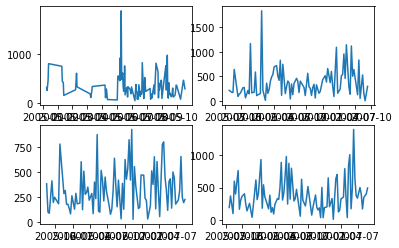

In [169]:
dfM=dfC.groupby('Dencaiss').agg(sum)
dfM['dayofweek']=[x.dayofweek for x in dfM.index]


fig,ax= plt.subplots(2,2)
ax[0,0].plot(dfM.index[:100],dfM.Montant[:100])
ax[0,1].plot(dfM.query('dayofweek==1').index[10:100],dfM.query('dayofweek==1').Montant[10:100])
ax[1,0].plot(dfM.query('dayofweek==2').index[10:100],dfM.query('dayofweek==2').Montant[10:100])
ax[1,1].plot(dfM.query('dayofweek==3').index[10:100],dfM.query('dayofweek==3').Montant[10:100])

#test=dfM.groupby([[x.month for x in dfM.index]]).mean()#.tail(40)
#test
#dfM.query('dayofweek==5')
#dfM.query('dayofweek==5')

In [166]:
stats.f_oneway(test.Montant)

TypeError: at least two inputs are required; got 1.

# non CLASSE

In [521]:
#Les redondances dans les numeros de facture proviennent de payements par bouts
#Les factures peuvent-elles servire comme index?

len(df.Facture.unique())/len(df.Facture)#96%
#Nous pensions à tort que les factures étaient uniques; tachons de trouver les redondances (4%)
s=df.Facture.value_counts()
s.gt(1).sum()#670
s.gt(2).sum()#500 environ=2
s.gt(3).sum()#140 ==3
s.eq(4).sum()#21
s.eq(5).sum()#8
s.gt(5).sum()#8
#Concentrons nous alors sur les 8 plus grandes factures
m=df.Facture.eq(s.index[0])
df[m].shape[0]#pas d'erreur
df[m]#On remarque que c'etait toujours la meme cliente Noelle Hannibal, la meme annee, Mapplique sont des montants ronds
df[df.Facture.eq(s.index[1])]#Maureen Cannon, pas les memes dates, Mapplique=(300,50,100,...)
x=2

In [522]:
#Mapplique NaN
dfnw=df.Mapplique.dropna()
dfnw=pd.to_numeric(dfnw, errors='coerce')
l1=len(dfnw)
l1-len(dfnw.dropna())#10 erreurs dans dfnw:c negligeable

10

In [523]:
#Arrondis
df.Arrond.isna().mean()#75%
df.Arrond.unique()
df.Arrond.value_counts()#.01:1750, .02:1658, -.02:1502, -.01:1486
df.Arrond.dropna().mean()#.09%
#Nous ne pensons pas qu'une augmentation de valeur en moyenne de .09% dans le cas d'arondis soit significatif.
#D'experience, un test non-paramétrique (H0:somme=0, H1:somme>0) ne sera pas positif et je ne vois pas d'hypotese a faire sur la distribution 

0.0009005628517823545

24430

In [525]:
dfg.isna().sum(axis=0)
#On a 20x plus de nan dans Montant que dans Mapplique

Mapplique     42
Montant      890
dtype: int64

In [606]:
i=df.Montant[df.Montant.isna()].index
test=df.loc[i]
test.isna().apply(np.mean,axis=0)
#On voit que tous les attribus sont pleins de NaN sauf Facture et Mapplique
test.index[0:10]# Int64Index([54, 61, 107, 108, 110, 111, 118, 119, 150, 204], dtype='int64')
df.loc[52:63]#On voit que NaN 54 et 61 correspondent a des factures incompletes
#Une facon de corriger serait d'ajouter les Mapplique de 'test' au Mapllique de l'index precedant
vAdd=df.Mapplique[test.index].values+df.Mapplique[test.index-1].values


TypeError: can only concatenate str (not "float") to str

In [687]:
#Nous reperons certaines valeurs non-numeriques: Factures 85902,86157 et 10628: elles  

a=df.Mapplique[test.index].values
b=df.Mapplique[test.index-1].values
iAnormal=np.isnan(pd.to_numeric(a,errors='coerce'))
iAnormal=df.Mapplique[test.index][iAnormal].index
df.loc[iDf[0]-5:iDf[0]+5]
df.loc[17495:17497].Facture.values
#les factures 85901,85902 et 86157 ont comme client l'entreprise 
#elles sont balencees (presence d'un -x==y+z)
#On en deduit que le '2Ê'present dans Factures:85902 et 86157 sont des erreurs, a eliminer
df.loc[iDf[-1]-3:iDf[-1]+3]
df[df.Mapplique==df.Mapplique[21461]-159.52]#Nous ne trouvons par le sens de la donnee
df.loc[iDf[-1]]#21462:Mapplique=1Ê159,52$, Facture=10628

Dencaiss            NaN
Dentree             NaN
Montant             NaN
Arrond              NaN
Client              NaN
Quart               NaN
Facture          106028
Mapplique    1Ê159,52 $
Name: 21462, dtype: object

In [690]:
df.loc[iDf[0]-5:iDf[0]+5]



,Dencaiss,Dentree,Montant,Arrond,Client,Quart,Facture,Mapplique
17490,2014-06-17 00:00:00,2014-06-17 00:00:00,17.2,NaN,Jenny Corbeil (80/R503),3092.0,86099.0,17.2
17491,2014-06-17 00:00:00,2014-06-17 00:00:00,96.1,NaN,Melanie Chartrand (187/R142),3092.0,86107.0,96.1
17492,2014-06-17 00:00:00,2014-06-17 00:00:00,20,-0.01,Vente comptoir,3092.0,86092.0,20.01
17493,2014-06-18 00:00:00,2014-06-18 00:00:00,7.7,0.01,Arlene Morris (814/R2226),3093.0,86139.0,7.69
17494,2014-06-18 00:00:00,2014-06-18 00:00:00,95.2,-0.02,Bonnie Spencer (7138/Rjj),3093.0,86144.0,95.22
17495,2014-06-18 00:00:00,2014-06-18 00:00:00,0,NaN,Centre VŽtŽrinaire DMV (1492/Rvet),3093.0,85901.0,92.97
17496,NaN,NaN,NaN,NaN,NaN,NaN,85902.0,"2Ê153,40 $"
17497,NaN,NaN,NaN,NaN,NaN,NaN,86157.0,"-2Ê246,37 $"
17498,2014-06-18 00:00:00,2014-06-18 00:00:00,17.2,NaN,Franoise Proulx (6902/R8),3093.0,86155.0,17.2
17499,2014-06-18 00:00:00,2014-06-18 00:00:00,40.25,-0.02,Gabrielle Patulli (4603/Rkk),3093.0,86129.0,40.27


#######################

# Analyse

####################